# Problem statement :
Predict future values for the Data Stock Index using Time Series Analysis

In [1]:
## Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import time
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
import warnings
warnings.warn('ignore')
%matplotlib inline

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: ignore


In [2]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [3]:
## Picking up the stocks for prediction
stocks =['NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
col_list = ['DATE'] + stocks
df1 = df[col_list]
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,1491226200,143.6800,102.2300,81.03,33.7400,33.3975
1,1491226260,143.7000,102.1400,81.21,33.8800,33.3950
2,1491226320,143.6901,102.2125,81.21,33.9000,33.4100
3,1491226380,143.6400,102.1400,81.13,33.8499,33.3350
4,1491226440,143.6600,102.0600,81.12,33.8400,33.4000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Data columns (total 6 columns):
DATE           41266 non-null int64
NASDAQ.AAPL    41266 non-null float64
NASDAQ.ADP     41266 non-null float64
NASDAQ.CBOE    41266 non-null float64
NASDAQ.CSCO    41266 non-null float64
NASDAQ.EBAY    41266 non-null float64
dtypes: float64(5), int64(1)
memory usage: 1.9 MB


In [5]:
##Checking for null values
df1.isnull().sum()

DATE           0
NASDAQ.AAPL    0
NASDAQ.ADP     0
NASDAQ.CBOE    0
NASDAQ.CSCO    0
NASDAQ.EBAY    0
dtype: int64

In [6]:
### Converting date
df1 =df1.copy()
##df1['DATE'] =  pd.to_datetime()
##df1.head()
df1['DATE'] = pd.to_datetime(df1['DATE'],unit='s')
df1.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [7]:
col_list = ['DATE']+ stocks
stock_ds = df1[col_list]
stock_ds.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 13:30:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 13:31:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 13:32:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 13:33:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 13:34:00,143.6600,102.0600,81.12,33.8400,33.4000


In [8]:
stock_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.160,144.640,149.9450,155.065,164.51
NASDAQ.ADP,41266.0,103.480398,4.424244,95.870,101.300,102.4400,104.660,121.77
NASDAQ.CBOE,41266.0,89.325485,5.746178,80.000,84.140,89.3150,93.850,101.35
NASDAQ.CSCO,41266.0,32.139336,0.985571,30.365,31.455,31.7733,32.790,34.49
NASDAQ.EBAY,41266.0,34.794506,1.099296,31.890,34.065,34.7700,35.610,37.46


### Time Series Forecasting for NASDAQ.AAPL

In [9]:
AAPL_df=stock_ds[['DATE','NASDAQ.AAPL']]
AAPL_df.head()

,DATE,NASDAQ.AAPL
0,2017-04-03 13:30:00,143.6800
1,2017-04-03 13:31:00,143.7000
2,2017-04-03 13:32:00,143.6901
3,2017-04-03 13:33:00,143.6400
4,2017-04-03 13:34:00,143.6600


In [10]:
AAPL_df.set_index('DATE',inplace=True)
AAPL_df.head()

,NASDAQ.AAPL
DATE,
2017-04-03 13:30:00,143.6800
2017-04-03 13:31:00,143.7000
2017-04-03 13:32:00,143.6901
2017-04-03 13:33:00,143.6400
2017-04-03 13:34:00,143.6600


In [11]:
## Summary
AAPL_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NASDAQ.AAPL,41266.0,150.453566,6.236826,140.16,144.64,149.945,155.065,164.51


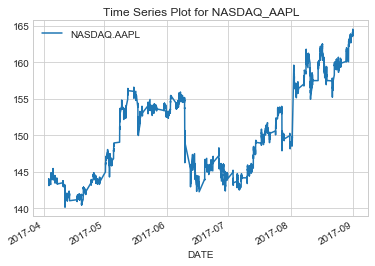

In [12]:
## Data Visualization
import seaborn as sns
sns.set_style('whitegrid')
AAPL_df.plot()
plt.title('Time Series Plot for NASDAQ_AAPL')
plt.show()

#### Rolling Statistics and Stationarity Test

In [13]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(timeseries)
    print('\nAugmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    for k,v in result[4].items():
        print('Crtical {} : value {}'.format(k,v))
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

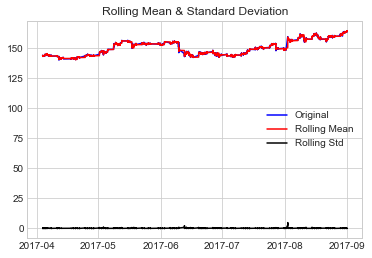


Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.9128532997926677
p-value : 0.7837101772613864
#Lags Used : 31
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [14]:
stationarity_test(AAPL_df['NASDAQ.AAPL'])

#### Making timeseries Stationary

##### First Difference
- The first difference of a time series is the series of changes from one period to the next. We can do this easily with pandas. You can continue to take the second difference, third difference, and so on until your data is stationary.

In [15]:
AAPL_df=AAPL_df.copy()
AAPL_df['First_Difference']=AAPL_df['NASDAQ.AAPL'] - AAPL_df['NASDAQ.AAPL'].shift(1)

In [16]:
AAPL_df.head()

,NASDAQ.AAPL,First_Difference
DATE,,
2017-04-03 13:30:00,143.6800,NaN
2017-04-03 13:31:00,143.7000,0.0200
2017-04-03 13:32:00,143.6901,-0.0099
2017-04-03 13:33:00,143.6400,-0.0501
2017-04-03 13:34:00,143.6600,0.0200


In [17]:
#Dropping NA
AAPL_df.dropna(inplace=True)

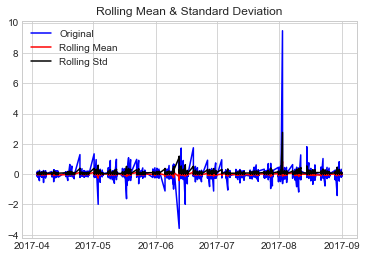


Augmented Dickey-Fuller Test:
ADF Test Statistic : -35.737741483401265
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 41234
Crtical 1% : value -3.4305085998723857
Crtical 5% : value -2.8616100975579815
Crtical 10% : value -2.5668073106689477
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
## Stationarity Test
stationarity_test(AAPL_df['First_Difference'])

##### Seasonal Decomposition

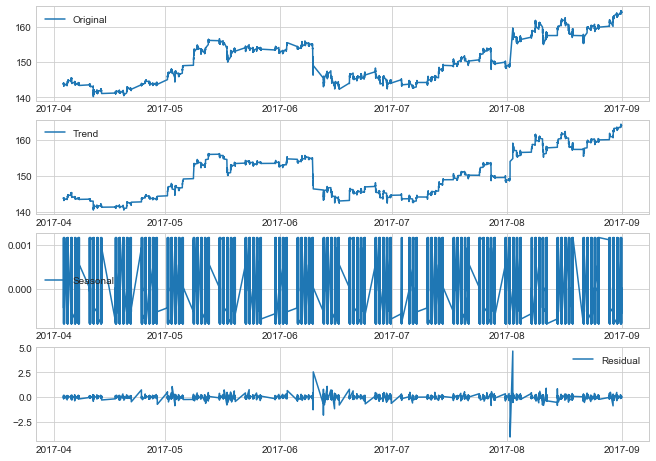

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(AAPL_df['NASDAQ.AAPL'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(AAPL_df['NASDAQ.AAPL'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

 The data is seasonal as interpreted from the Seasonal plot of seasonal decomposition.

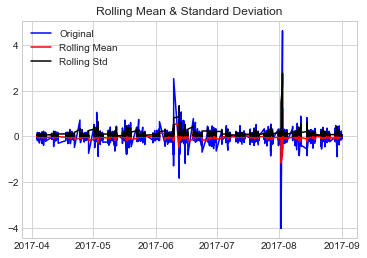


Augmented Dickey-Fuller Test:
ADF Test Statistic : -43.04343353554248
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [20]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
## DF Test on residual
stationarity_test(ts_decompose)

#### Autocorrelation and Partial Autocorrelation Plots

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

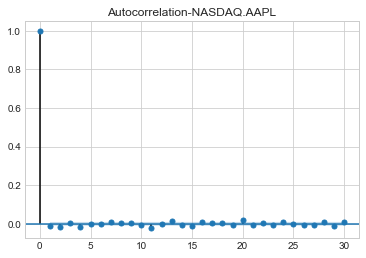

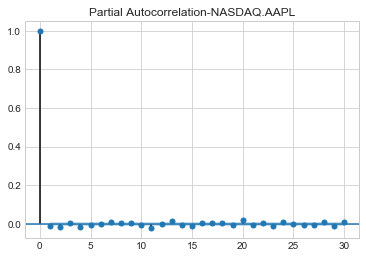

In [22]:
fig_first = plot_acf(AAPL_df["First_Difference"],lags=30,title='Autocorrelation-NASDAQ.AAPL')
fig_pacf_first = plot_pacf(AAPL_df["First_Difference"],lags=30,title='Partial Autocorrelation-NASDAQ.AAPL')

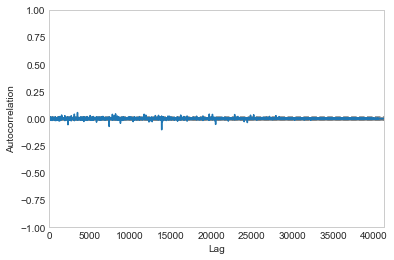

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(AAPL_df['First_Difference'])

##### Forecasting a Time Series Using Seasonal ARIMA

In [24]:
import statsmodels.api as sm
model= sm.tsa.statespace.SARIMAX(AAPL_df['NASDAQ.AAPL'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.AAPL   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               24925.552
Date:                            Fri, 19 Apr 2019   AIC                         -49849.104
Time:                                    20:57:31   BIC                         -49840.477
Sample:                                         0   HQIC                        -49846.377
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0175   4.57e-06   3828.710      0.000       0.017       0.017
Ljung-Box (Q):                    1

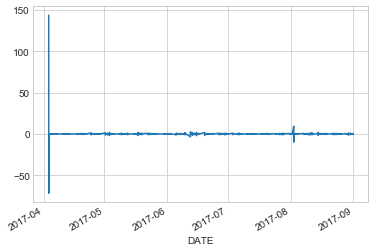

In [25]:
results.resid.plot()

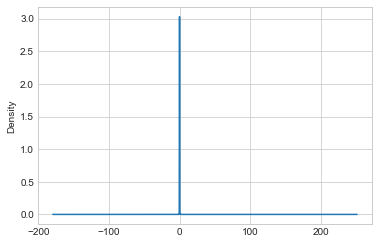

In [26]:
results.resid.plot(kind='kde')

In [27]:
AAPL_df = AAPL_df.copy()
AAPL_df['Forecast'] = results.predict()

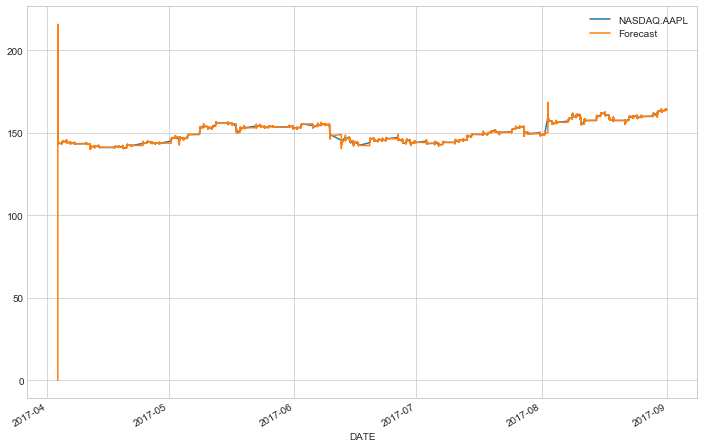

In [28]:
AAPL_df[['NASDAQ.AAPL','Forecast']].plot(figsize=(12,8))

##### Accuracy of Forecasting using MSE

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(AAPL_df['NASDAQ.AAPL'],AAPL_df['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(AAPL_df['NASDAQ.AAPL'],AAPL_df['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.6426408211595875
Mean Absolute Error NASDAQ.AAPL - 0.07550728209100216


## Time Series Forecasting for NASDAQ.ADP

In [30]:
ADP_df=stock_ds[['DATE','NASDAQ.ADP']]
ADP_df.head()

,DATE,NASDAQ.ADP
0,2017-04-03 13:30:00,102.2300
1,2017-04-03 13:31:00,102.1400
2,2017-04-03 13:32:00,102.2125
3,2017-04-03 13:33:00,102.1400
4,2017-04-03 13:34:00,102.0600


In [31]:
ADP_df.set_index('DATE',inplace=True)
ADP_df.head()

,NASDAQ.ADP
DATE,
2017-04-03 13:30:00,102.2300
2017-04-03 13:31:00,102.1400
2017-04-03 13:32:00,102.2125
2017-04-03 13:33:00,102.1400
2017-04-03 13:34:00,102.0600


Text(0.5,1,'Time Series Plot')

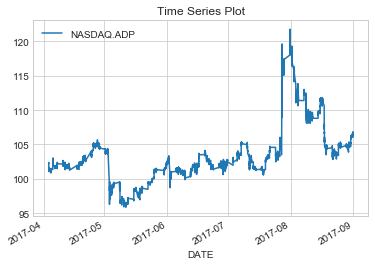

In [32]:
ADP_df.plot()
plt.title('Time Series Plot')

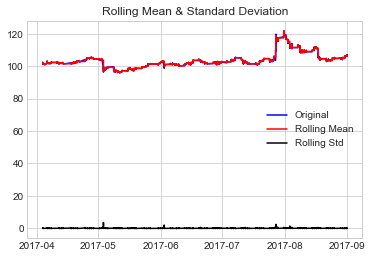


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.7041735251574655
p-value : 0.4289634442066917
#Lags Used : 39
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
stationarity_test(ADP_df['NASDAQ.ADP'])

### MAKING THE TIME SERIES STATIONARY

#### Difference

In [34]:
ADP_df = ADP_df.copy()
ADP_df['First_Difference'] = ADP_df['NASDAQ.ADP'] - ADP_df['NASDAQ.ADP'].shift(1)

In [35]:
ADP_df.head()

,NASDAQ.ADP,First_Difference
DATE,,
2017-04-03 13:30:00,102.2300,NaN
2017-04-03 13:31:00,102.1400,-0.0900
2017-04-03 13:32:00,102.2125,0.0725
2017-04-03 13:33:00,102.1400,-0.0725
2017-04-03 13:34:00,102.0600,-0.0800


In [36]:
## Removing Null Values
ADP_df.dropna(inplace=True)

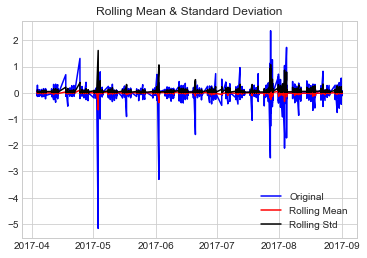


Augmented Dickey-Fuller Test:
ADF Test Statistic : -31.05566224463172
p-value : 0.0
#Lags Used : 38
Number of Observations Used : 41226
Crtical 1% : value -3.4305086306509716
Crtical 5% : value -2.861610111161057
Crtical 10% : value -2.5668073179094897
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [37]:
stationarity_test(ADP_df['First_Difference'])

#### Seasonal Decomposition

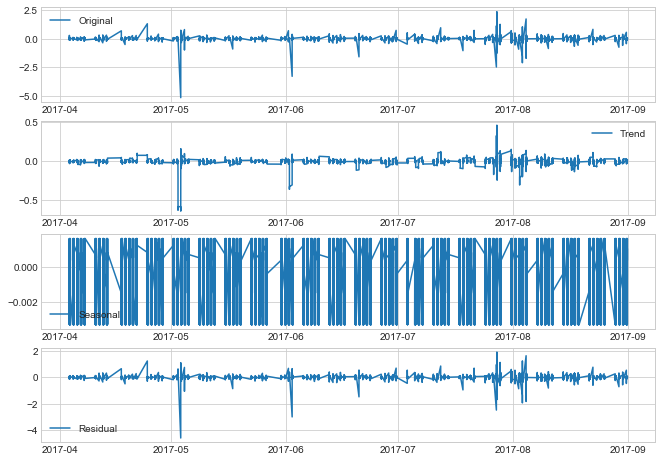

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(ADP_df['First_Difference'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(ADP_df['First_Difference'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

#### Note:
The data for NASDAQ.ADP is seasonal as interpreted from the seasonal plot of seasonal decomposition.

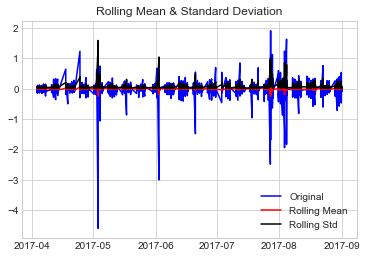


Augmented Dickey-Fuller Test:
ADF Test Statistic : -57.84866544114176
p-value : 0.0
#Lags Used : 55
Number of Observations Used : 41197
Crtical 1% : value -3.4305087423235587
Crtical 5% : value -2.861610160516496
Crtical 10% : value -2.566807344180027
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [39]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
stationarity_test(ts_decompose)

##### Autocorrelation and Partial correlation Plot

Text(0.5,1,'Partial Autocorrelation')

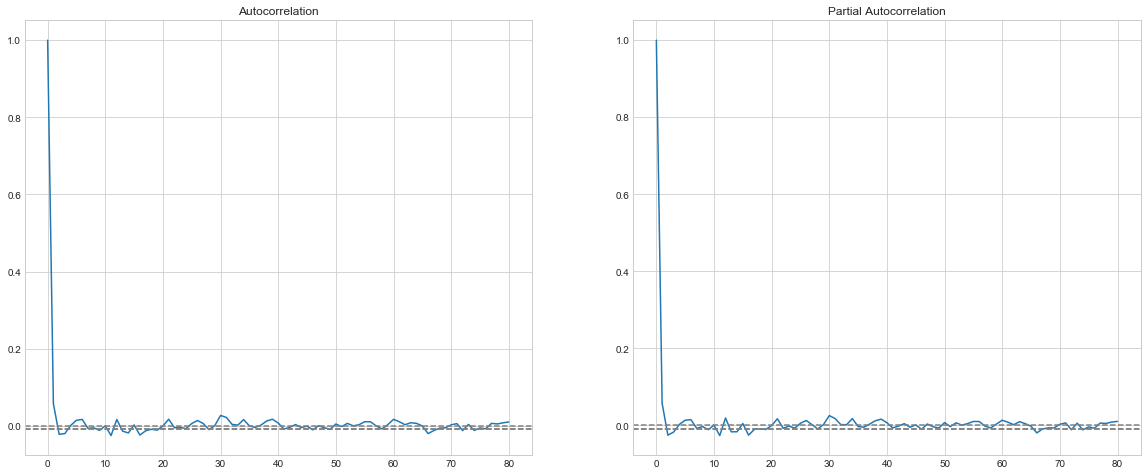

In [40]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ADP_df['First_Difference'],nlags=80)
lag_pacf = pacf(ADP_df['First_Difference'],nlags=80,method='ols')

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ADP_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

In [41]:
model= sm.tsa.statespace.SARIMAX(ADP_df['NASDAQ.ADP'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                         NASDAQ.ADP   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               34733.013
Date:                            Fri, 19 Apr 2019   AIC                         -69464.026
Time:                                    20:58:35   BIC                         -69455.399
Sample:                                         0   HQIC                        -69461.299
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0109   5.34e-06   2036.710      0.000       0.011       0.011
Ljung-Box (Q):                    1

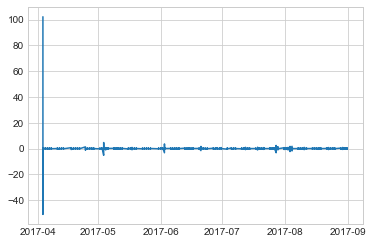

In [42]:
plt.plot(results.resid)

In [43]:
## Forecasting
ADP_df['Forecast'] = results.predict()
ADP_df[['NASDAQ.ADP','Forecast']].tail()

,NASDAQ.ADP,Forecast
DATE,,
2017-08-31 19:56:00,106.565,106.705
2017-08-31 19:57:00,106.590,106.525
2017-08-31 19:58:00,106.520,106.510
2017-08-31 19:59:00,106.400,106.480
2017-08-31 20:00:00,106.470,106.430


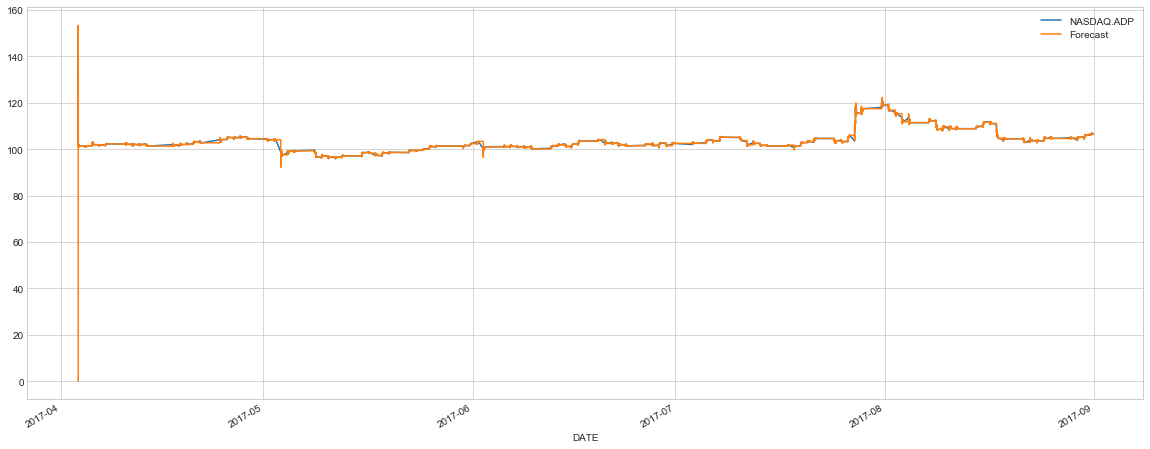

In [44]:
## Plotting actual Value and Forecasted Value
ADP_df[['NASDAQ.ADP','Forecast']].plot(figsize=(20,8))

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.AAPL -', mean_squared_error(ADP_df['NASDAQ.ADP'],ADP_df['Forecast']))
print('Mean Absolute Error NASDAQ.AAPL -', mean_absolute_error(ADP_df['NASDAQ.ADP'],ADP_df['Forecast']))

Mean Squared Error NASDAQ.AAPL - 0.32679381129889773
Mean Absolute Error NASDAQ.AAPL - 0.05339673819156222


### Timeseries Prediction of NASDAQ.CBOE

                 DATE  NASDAQ.CBOE
0 2017-04-03 13:30:00        81.03
1 2017-04-03 13:31:00        81.21
2 2017-04-03 13:32:00        81.21
3 2017-04-03 13:33:00        81.13
4 2017-04-03 13:34:00        81.12
                     NASDAQ.CBOE
DATE                            
2017-04-03 13:30:00        81.03
2017-04-03 13:31:00        81.21
2017-04-03 13:32:00        81.21
2017-04-03 13:33:00        81.13
2017-04-03 13:34:00        81.12


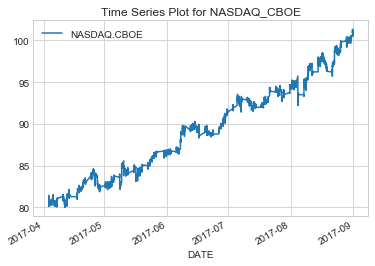

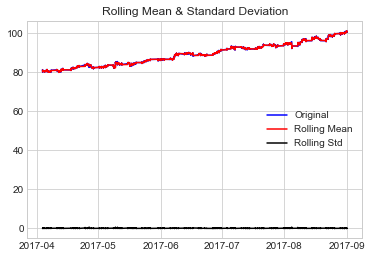


Augmented Dickey-Fuller Test:
ADF Test Statistic : 0.1663393028261253
p-value : 0.970309203051006
#Lags Used : 27
Number of Observations Used : 41238
Crtical 1% : value -3.430508584487571
Crtical 5% : value -2.8616100907584228
Crtical 10% : value -2.5668073070497304
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [46]:
CBOE_df= stock_ds[['DATE','NASDAQ.CBOE']]
print(CBOE_df.head())
CBOE_df.set_index('DATE',inplace=True)
print(CBOE_df.head())

CBOE_df.plot()
plt.title('Time Series Plot for NASDAQ_CBOE')
plt.show()
#test Stationarity
stationarity_test(CBOE_df['NASDAQ.CBOE'])

In [47]:
### Making data stationary
## Differenceing
CBOE_df=CBOE_df.copy()
CBOE_df['First_Difference']=CBOE_df['NASDAQ.CBOE']-CBOE_df['NASDAQ.CBOE'].shift(1)
#Dropping null 
CBOE_df.dropna(inplace=True)
CBOE_df.head()

,NASDAQ.CBOE,First_Difference
DATE,,
2017-04-03 13:31:00,81.21,0.18
2017-04-03 13:32:00,81.21,0.00
2017-04-03 13:33:00,81.13,-0.08
2017-04-03 13:34:00,81.12,-0.01
2017-04-03 13:35:00,81.22,0.10


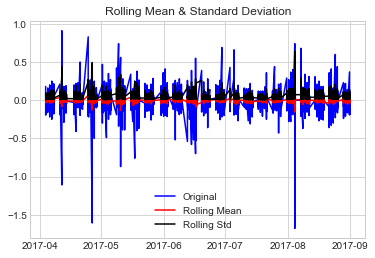


Augmented Dickey-Fuller Test:
ADF Test Statistic : -41.6420936454317
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 41238
Crtical 1% : value -3.430508584487571
Crtical 5% : value -2.8616100907584228
Crtical 10% : value -2.5668073070497304
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [48]:
## Stationarity Check
stationarity_test(CBOE_df['First_Difference'])

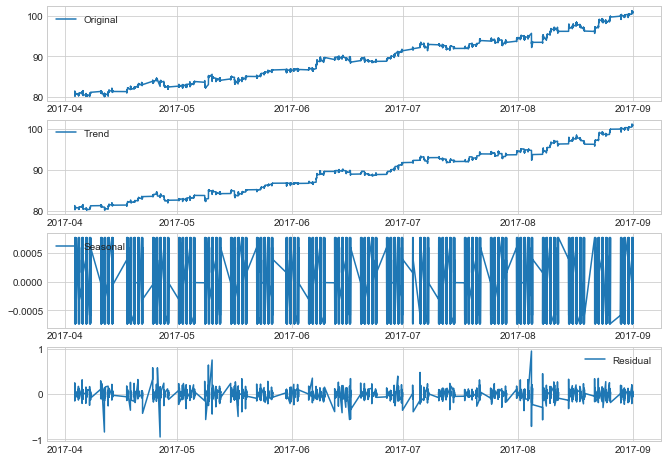

In [49]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(CBOE_df['NASDAQ.CBOE'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(CBOE_df['NASDAQ.CBOE'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

Text(0.5,1,'Partial Autocorrelation')

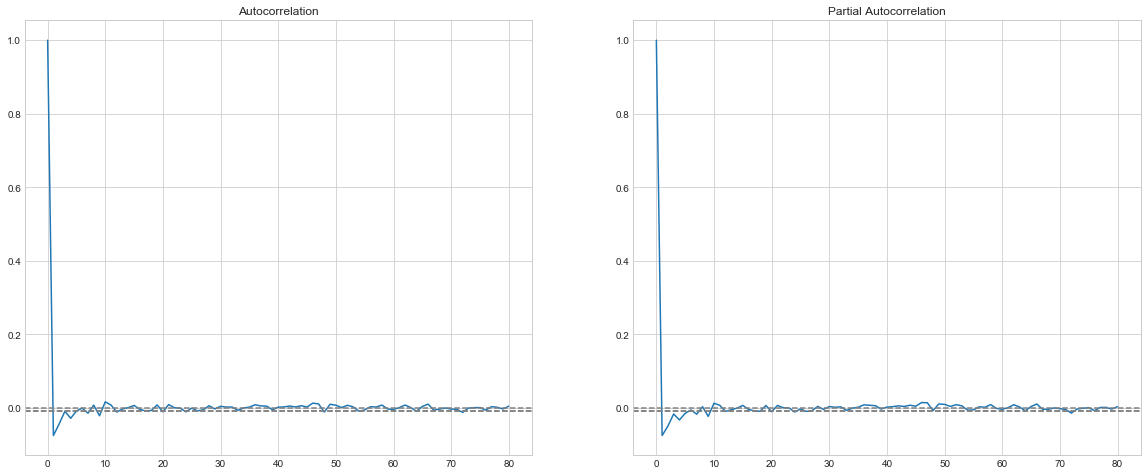

In [50]:
## Auto correlation and Partial autocorrelation plot
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(CBOE_df['First_Difference'],nlags=80)
lag_pacf = pacf(CBOE_df['First_Difference'],nlags=80,method='ols')

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CBOE_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

In [51]:
model= sm.tsa.statespace.SARIMAX(CBOE_df['NASDAQ.CBOE'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CBOE   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               53414.092
Date:                            Fri, 19 Apr 2019   AIC                        -106826.184
Time:                                    20:59:16   BIC                        -106817.556
Sample:                                         0   HQIC                       -106823.457
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0044   5.33e-06    824.276      0.000       0.004       0.004
Ljung-Box (Q):                    1

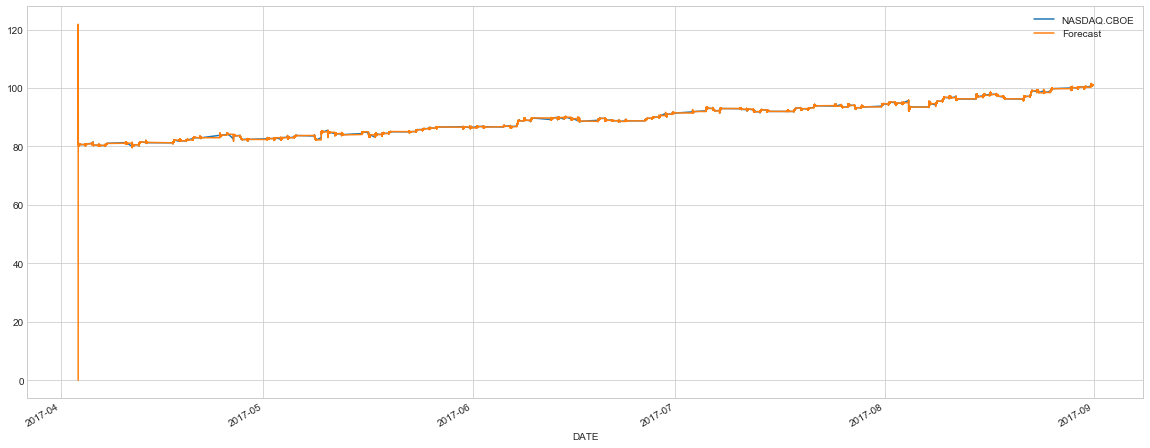

In [52]:
CBOE_df['Forecast']=results.predict()
CBOE_df[['NASDAQ.CBOE','Forecast']].plot(figsize=(20,8))

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CBOE -', mean_squared_error(CBOE_df['NASDAQ.CBOE'],CBOE_df['Forecast']))
print('Mean Absolute Error NASDAQ.CBOE -', mean_absolute_error(CBOE_df['NASDAQ.CBOE'],CBOE_df['Forecast']))

Mean Squared Error NASDAQ.CBOE - 0.2039940019832608
Mean Absolute Error NASDAQ.CBOE - 0.04356630559048824


### Timeseries forecasting for NASDAQ.CSCO

                 DATE  NASDAQ.CSCO
0 2017-04-03 13:30:00      33.7400
1 2017-04-03 13:31:00      33.8800
2 2017-04-03 13:32:00      33.9000
3 2017-04-03 13:33:00      33.8499
4 2017-04-03 13:34:00      33.8400
                     NASDAQ.CSCO
DATE                            
2017-04-03 13:30:00      33.7400
2017-04-03 13:31:00      33.8800
2017-04-03 13:32:00      33.9000
2017-04-03 13:33:00      33.8499
2017-04-03 13:34:00      33.8400


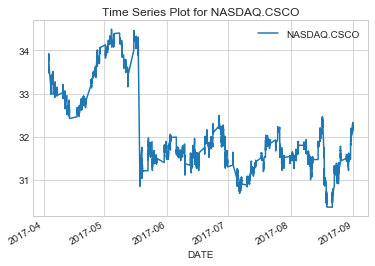

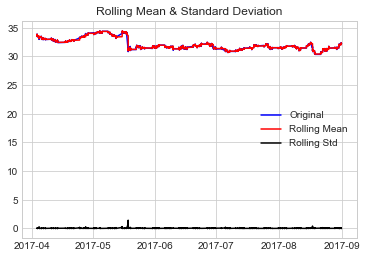


Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.395554610889476
p-value : 0.1429950199516406
#Lags Used : 47
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [54]:
CSCO_df = stock_ds[['DATE','NASDAQ.CSCO']]
print(CSCO_df.head())
CSCO_df.set_index('DATE',inplace=True)
print(CSCO_df.head())
CSCO_df.plot()
plt.title("Time Series Plot for NASDAQ.CSCO")
plt.show()
#Test Staionarity
stationarity_test(CSCO_df['NASDAQ.CSCO'])

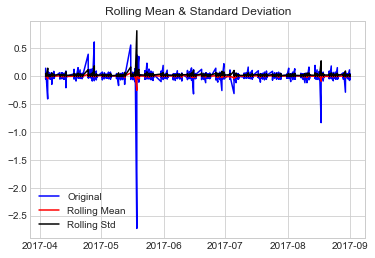


Augmented Dickey-Fuller Test:
ADF Test Statistic : -30.356682532566758
p-value : 0.0
#Lags Used : 46
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [55]:
## Making data stationary as differencing
CSCO_df = CSCO_df.copy()
CSCO_df['First_Difference'] = CSCO_df['NASDAQ.CSCO'] - CSCO_df['NASDAQ.CSCO'].shift(1)
CSCO_df.dropna(inplace=True)
stationarity_test(CSCO_df['First_Difference'])

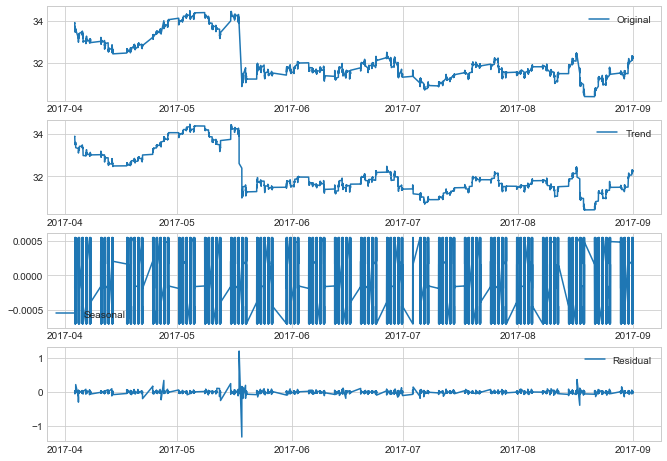

In [56]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(CSCO_df['NASDAQ.CSCO'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(CSCO_df['NASDAQ.CSCO'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

Text(0.5,1,'Partial Autocorrelation')

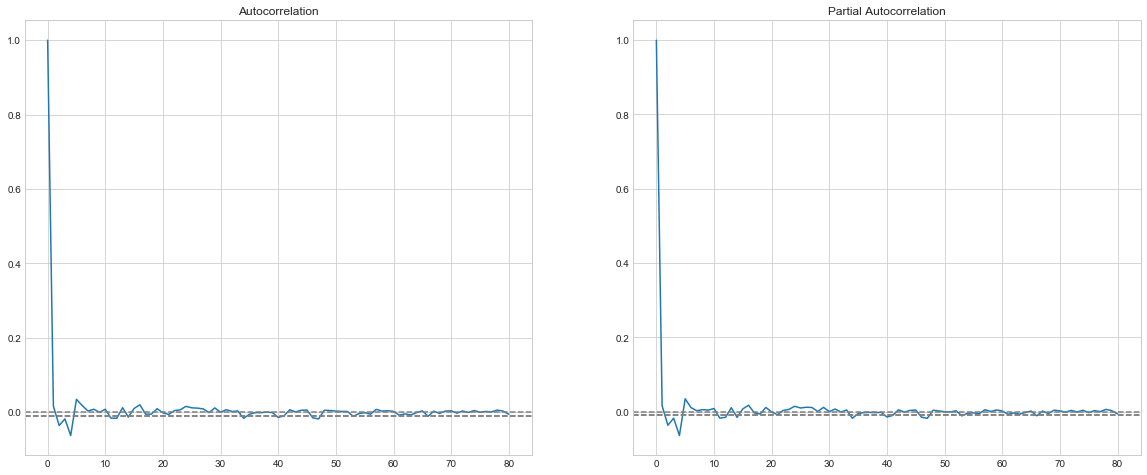

In [57]:
## Auto correlation and Partial autocorrelation plot
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(CSCO_df['First_Difference'],nlags=80)
lag_pacf = pacf(CSCO_df['First_Difference'],nlags=80,method='ols')

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(CSCO_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.CSCO   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               85502.595
Date:                            Fri, 19 Apr 2019   AIC                        -171003.190
Time:                                    21:00:02   BIC                        -170994.563
Sample:                                         0   HQIC                       -171000.463
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   1.54e-07   6012.819      0.000       0.001       0.001
Ljung-Box (Q):                    1

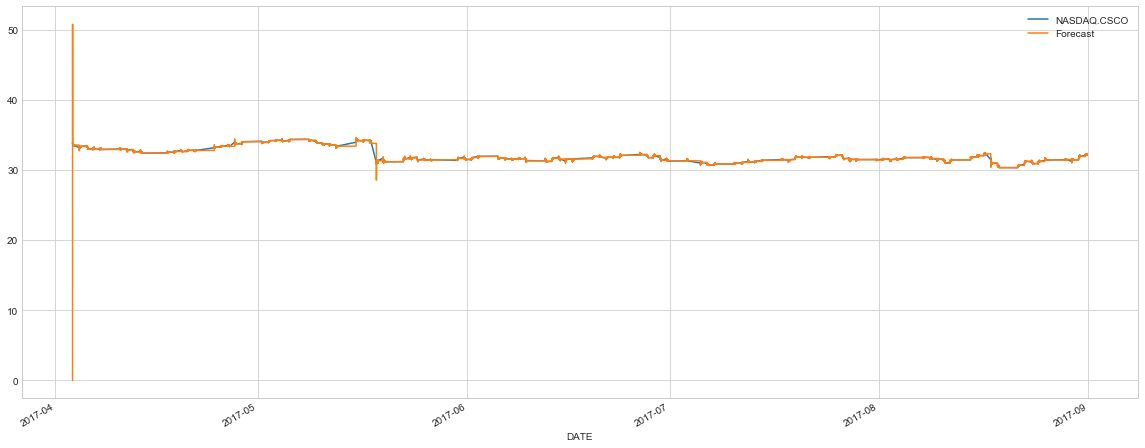

In [58]:
# fit model
model= sm.tsa.statespace.SARIMAX(CSCO_df['NASDAQ.CSCO'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
CSCO_df['Forecast'] = results.predict()
CSCO_df[['NASDAQ.CSCO','Forecast']].plot(figsize=(20,8))
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.CSCO -', mean_squared_error(CSCO_df['NASDAQ.CSCO'],CSCO_df['Forecast']))
print('Mean Absolute Error NASDAQ.CSCO -', mean_absolute_error(CSCO_df['NASDAQ.CSCO'],CSCO_df['Forecast']))

Mean Squared Error NASDAQ.CSCO - 0.0356937844969608
Mean Absolute Error NASDAQ.CSCO - 0.015775407730929


### Time Series Forecasting for NASDAQ.EBAY

                 DATE  NASDAQ.EBAY
0 2017-04-03 13:30:00      33.3975
1 2017-04-03 13:31:00      33.3950
2 2017-04-03 13:32:00      33.4100
3 2017-04-03 13:33:00      33.3350
4 2017-04-03 13:34:00      33.4000
                     NASDAQ.EBAY
DATE                            
2017-04-03 13:30:00      33.3975
2017-04-03 13:31:00      33.3950
2017-04-03 13:32:00      33.4100
2017-04-03 13:33:00      33.3350
2017-04-03 13:34:00      33.4000


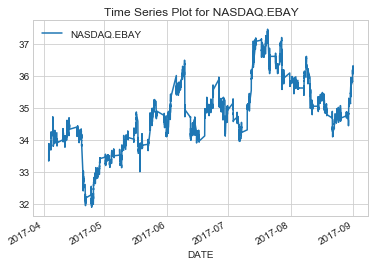

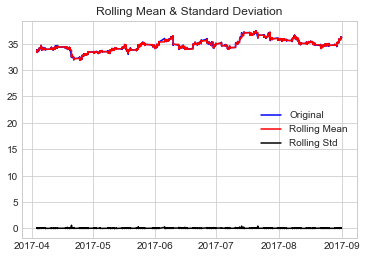


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.8757616359413931
p-value : 0.3435480878024858
#Lags Used : 47
Number of Observations Used : 41218
Crtical 1% : value -3.430508661441506
Crtical 5% : value -2.8616101247694137
Crtical 10% : value -2.566807325152842
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [60]:
EBAY_df = stock_ds[['DATE','NASDAQ.EBAY']]
print(EBAY_df.head())
EBAY_df.set_index('DATE',inplace=True)
print(EBAY_df.head())
EBAY_df.plot()
plt.title("Time Series Plot for NASDAQ.EBAY")
plt.show()
#Test Staionarity
stationarity_test(EBAY_df['NASDAQ.EBAY'])

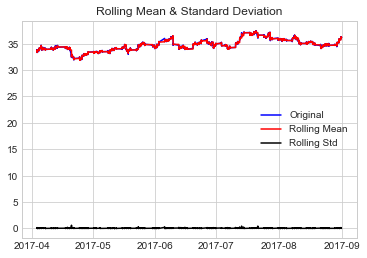


Augmented Dickey-Fuller Test:
ADF Test Statistic : -1.863913310658429
p-value : 0.3492231149987333
#Lags Used : 47
Number of Observations Used : 41217
Crtical 1% : value -3.4305086652911636
Crtical 5% : value -2.8616101264708296
Crtical 10% : value -2.5668073260584587
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [61]:
### Making data stationary using differencing
EBAY_df = EBAY_df.copy()
EBAY_df['First_Difference'] = EBAY_df['NASDAQ.EBAY'] - EBAY_df['NASDAQ.EBAY'].shift(1)
EBAY_df.dropna(inplace=True)
#test Stationarity
stationarity_test(EBAY_df['NASDAQ.EBAY'])

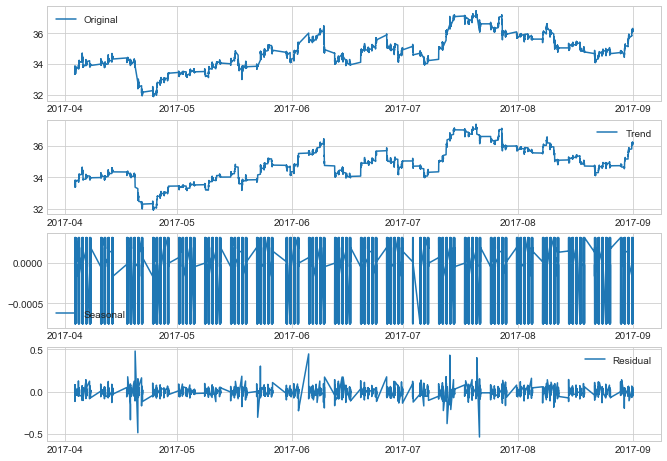

In [62]:
#Seasonal Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(11,8))
decomposition = seasonal_decompose(EBAY_df['NASDAQ.EBAY'],freq=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(EBAY_df['NASDAQ.EBAY'],label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

Text(0.5,1,'Partial Autocorrelation')

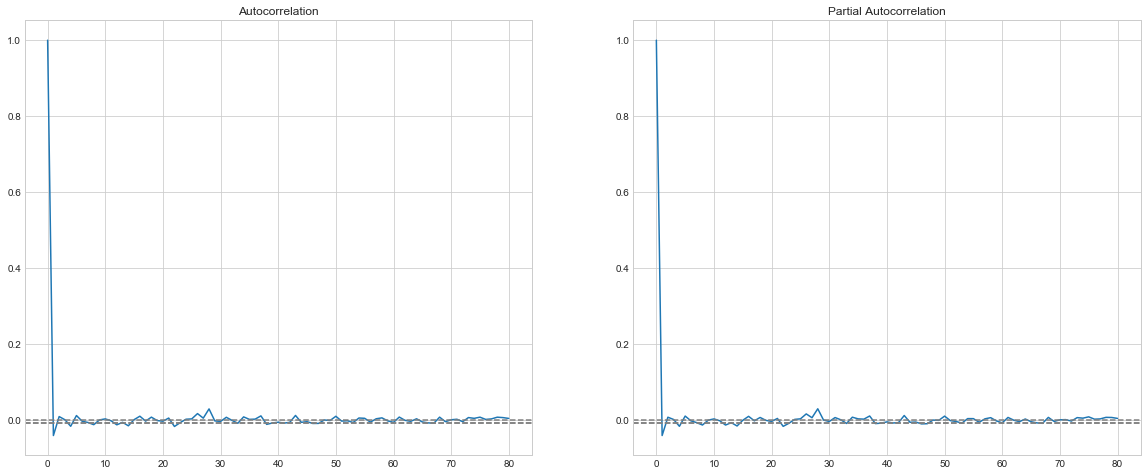

In [63]:
## Auto correlation and Partial autocorrelation plot
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(EBAY_df['First_Difference'],nlags=80)
lag_pacf = pacf(EBAY_df['First_Difference'],nlags=80,method='ols')

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Autocorrelation')

plt.subplot(122)

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_df['First_Difference'])),linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(EBAY_df['First_Difference'])),linestyle='--',color='gray')

plt.title('Partial Autocorrelation')

C:\Users\Mathews_Pious\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                        NASDAQ.EBAY   No. Observations:                41265
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               82104.712
Date:                            Fri, 19 Apr 2019   AIC                        -164207.424
Time:                                    21:00:50   BIC                        -164198.797
Sample:                                         0   HQIC                       -164204.697
                                          - 41265                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0011   9.43e-07   1158.843      0.000       0.001       0.001
Ljung-Box (Q):                    1

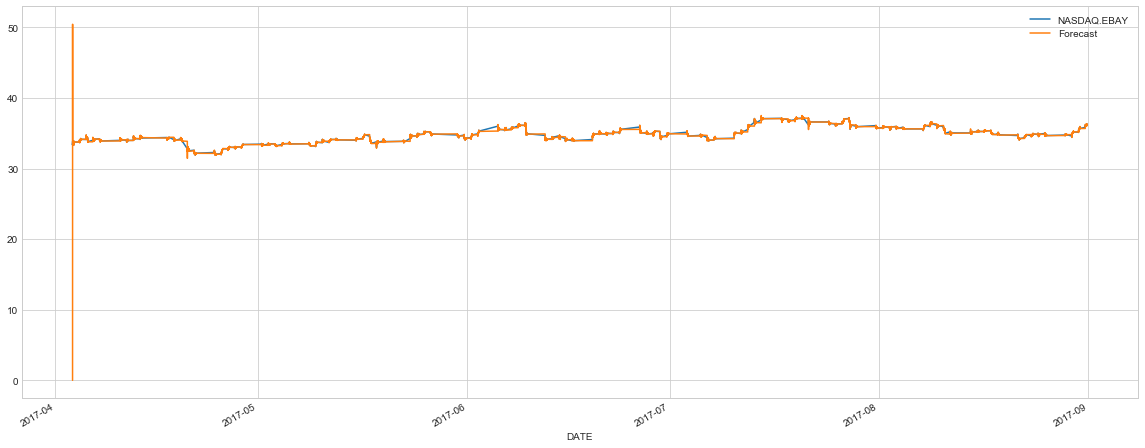

In [64]:
# fit model
model= sm.tsa.statespace.SARIMAX(EBAY_df['NASDAQ.EBAY'],order=(0,1,0),seasonal_order=(0,1,0,12))
results = model.fit()
print(results.summary())
EBAY_df['Forecast'] = results.predict()
EBAY_df[['NASDAQ.EBAY','Forecast']].plot(figsize=(20,8))
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print('Mean Squared Error NASDAQ.EBAY -', mean_squared_error(EBAY_df['NASDAQ.EBAY'],EBAY_df['Forecast']))
print('Mean Absolute Error NASDAQ.EBAY -', mean_absolute_error(EBAY_df['NASDAQ.EBAY'],EBAY_df['Forecast']))

Mean Squared Error NASDAQ.EBAY - 0.03483567894575233
Mean Absolute Error NASDAQ.EBAY - 0.021688033609985485
